In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
import os

print(os.listdir("Data"))

['MNIST']


In [4]:
def transform(data):
    data = transforms.ToTensor()(data)
    return torch.floor(data * 255 / 128).squeeze(0)

mnist_train = datasets.MNIST(root="data/", train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root="data/", train=False, download=True, transform=transform)

In [5]:
image, label = mnist_train[0]
image.shape, label

(torch.Size([28, 28]), 5)

In [6]:
image.shape, image.dtype

(torch.Size([28, 28]), torch.float32)

In [7]:
label, type(label)

(5, int)

In [8]:
dataloader = DataLoader(mnist_train, batch_size=len(mnist_train), shuffle=False)
X, Y = next(iter(dataloader))

print(X.shape, Y.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])


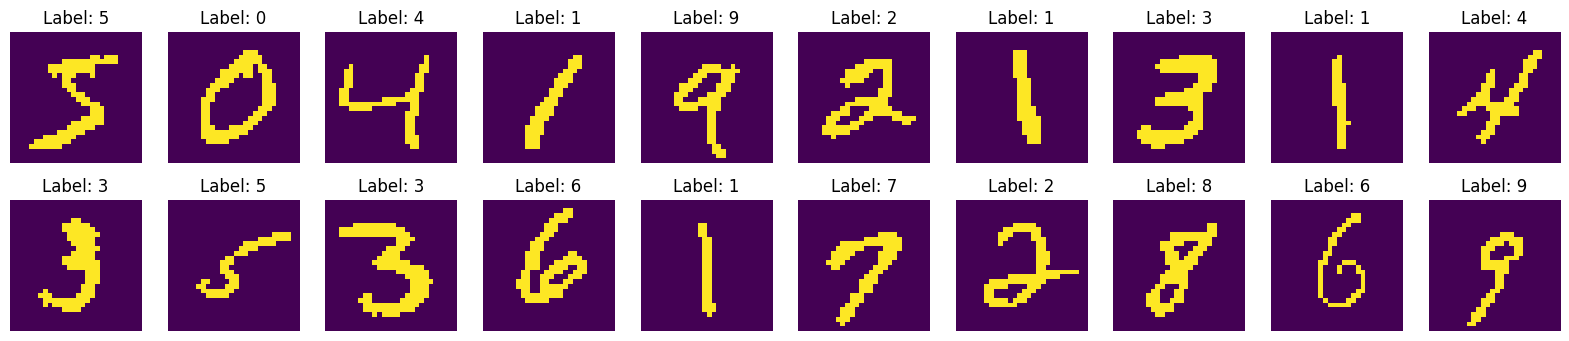

In [9]:
fig, axes = plt.subplots(2, 10, figsize=(20, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].squeeze(0))
    ax.set_title(f"Label: {Y[i].item()}")
    ax.axis("off")

plt.show()

In [10]:
n_y = np.zeros((10))

for y in range(10):
    n_y[y] = (Y == y).sum()
P_y = n_y / n_y.sum()
P_y

array([0.09871667, 0.11236667, 0.0993    , 0.10218333, 0.09736667,
       0.09035   , 0.09863333, 0.10441667, 0.09751667, 0.09915   ])

In [11]:
n_x = np.zeros((10, 28, 28))

for y in range(10):
    n_x[y] = X[Y == y].sum(dim=0)

P_xy = (n_x + 1) / (n_y + 1).reshape(10, 1, 1)

In [12]:
log_P_xy = np.log(P_xy)
log_P_xy_neg = np.log(1 - P_xy)
log_P_y = np.log(P_y)

def bayes_pred_stable(x):
    x = np.expand_dims(x, axis=0)  # (28, 28) -> (1, 28, 28)
    p_xy = log_P_xy * x + log_P_xy_neg * (1 - x)
    p_xy = p_xy.reshape(10, -1).sum(axis=1)  # p(x|y)
    return p_xy + log_P_y

py = bayes_pred_stable(image)
py

array([-266.66376186, -320.79814072, -261.50877299, -202.63194188,
       -295.57830636, -199.49410449, -318.66715711, -266.01479039,
       -224.60348626, -271.93504952])

In [13]:
py.argmax(axis=0) == int(label)

True

In [14]:
def predict(X):
    return [bayes_pred_stable(x).argmax(axis=0).astype(np.int32) for x in X]

In [15]:
dataloader = DataLoader(mnist_test, batch_size=len(mnist_test), shuffle=False)
X, y = next(iter(dataloader))
X.shape, y

(torch.Size([10000, 28, 28]), tensor([7, 2, 1,  ..., 4, 5, 6]))

In [16]:
preds = predict(X)

In [19]:
preds = np.array(predict(X), dtype=np.int32)
float((preds == y).sum()) / len(y)

0.8426

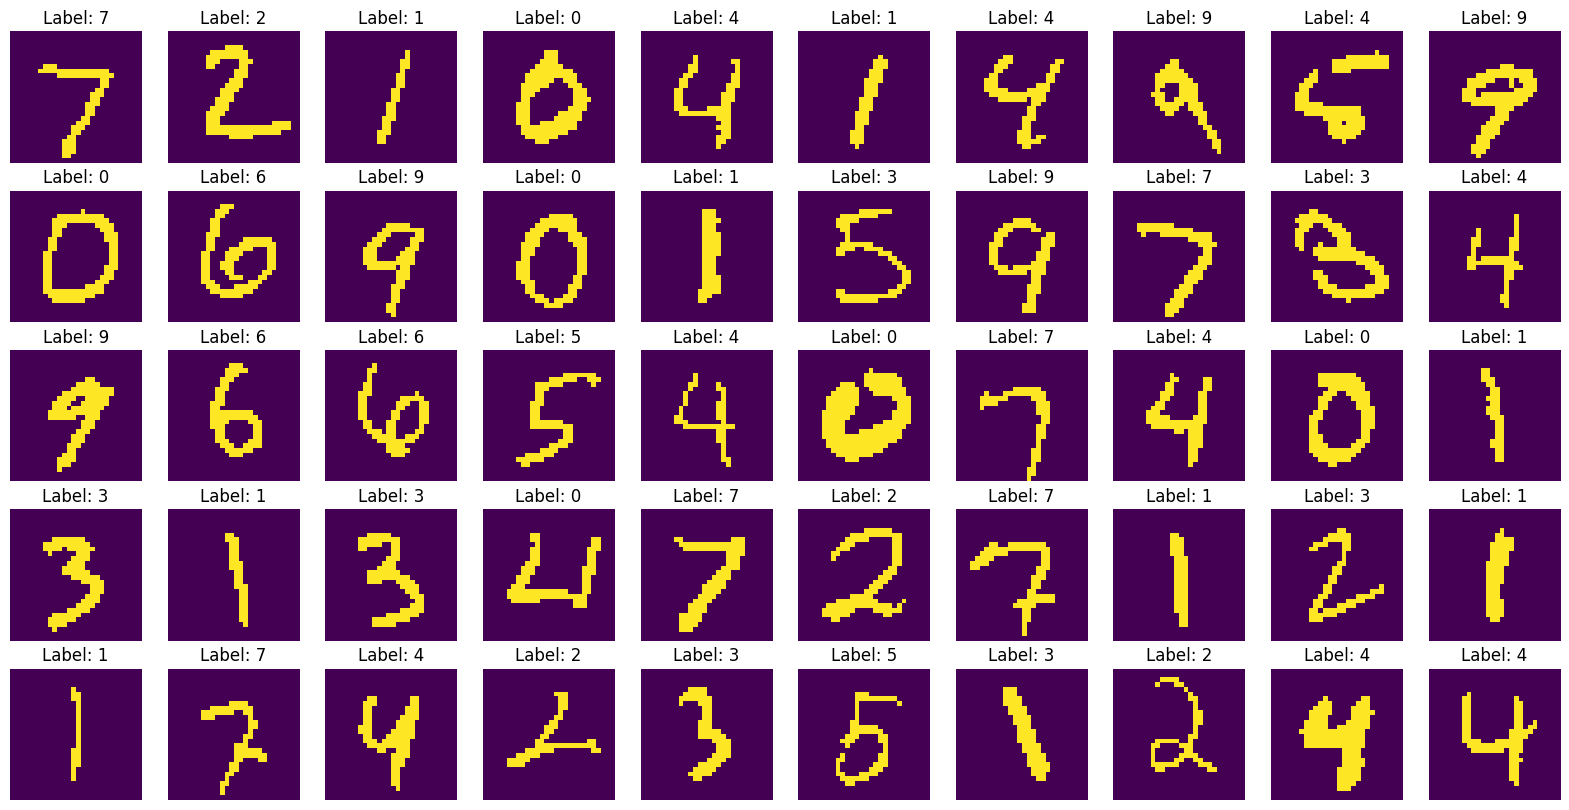

In [26]:
fig, axes = plt.subplots(5, 10, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].squeeze(0))
    ax.set_title(f"Label: {preds[i].item()}")
    ax.axis("off")

plt.show()